<a href="https://colab.research.google.com/github/Virtualexistence/Image_Classifier-Sentiment-/blob/main/DeepImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import imghdr
import os

#Importing and Cleaning Data

In [9]:
dir = 'drive/MyDrive/Image_Classifier'
image_ext = ['jpeg', 'jpg', 'bmp', 'png']

In [10]:
os.listdir(dir)

['Happy', 'Sad']

In [ ]:
os.listdir(os.path.join(dir, 'Happy'))

In [12]:
#Cleaning images of lower res and incompatible format 
for img_class in os.listdir(dir):
  for img in os.listdir(os.path.join(dir, img_class)):
    img_path = os.path.join(dir, img_class, img)
    try:
      image = cv2.imread(img_path)
      t = imghdr.what(img_path)
      if t not in image_ext:
        print("Image not compatible: {}".format(img_path))
        os.remove(img_path)
    except Exception as e:
      print("Error raised by {}".format(img_path))

Image not compatible: drive/MyDrive/Image_Classifier/Happy/2560px-Happy_People.jpg
Image not compatible: drive/MyDrive/Image_Classifier/Happy/portrait-young-father-carrying-his-260nw-736997836.jpg
Image not compatible: drive/MyDrive/Image_Classifier/Happy/portrait-smiling-young-friends-walking-260nw-1392193913.jpg
Image not compatible: drive/MyDrive/Image_Classifier/Happy/427394C200000578-0-image-a-24_1500384481554.jpg
Image not compatible: drive/MyDrive/Image_Classifier/Happy/56f455011e0000b300705475.jpeg
Image not compatible: drive/MyDrive/Image_Classifier/Happy/31418025-diverse-happy-people.jpg
Image not compatible: drive/MyDrive/Image_Classifier/Happy/guilherme-stecanella-375176-unsplash.jpg
Image not compatible: drive/MyDrive/Image_Classifier/Happy/traitshappypeople.jpg
Image not compatible: drive/MyDrive/Image_Classifier/Sad/39843138-sad-man.jpg
Image not compatible: drive/MyDrive/Image_Classifier/Sad/secret-signs-of-loneliness-01-1440x810.jpg
Image not compatible: drive/MyDrive/

In [14]:
print("Compatible {} Happy pics and {} Sad pics".format(len(os.listdir(os.path.join(dir, 'Happy'))),len(os.listdir(os.path.join(dir, 'Sad')))))

Compatible 105 Happy pics and 77 Sad pics


In [ ]:
help(tf.keras.utils.image_dataset_from_directory)

In [15]:
data = tf.keras.utils.image_dataset_from_directory(dir)

Found 182 files belonging to 2 classes.


In [20]:
data_iter = data.as_numpy_iterator()

In [21]:
batch = data_iter.next()

In [23]:
print(len(batch)) #Image and the Class 
print(batch[0].shape) #32 batches, 256x256 Res and 3 layered i.e. RGB

2
(32, 256, 256, 3)


In [26]:
batch[1]

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

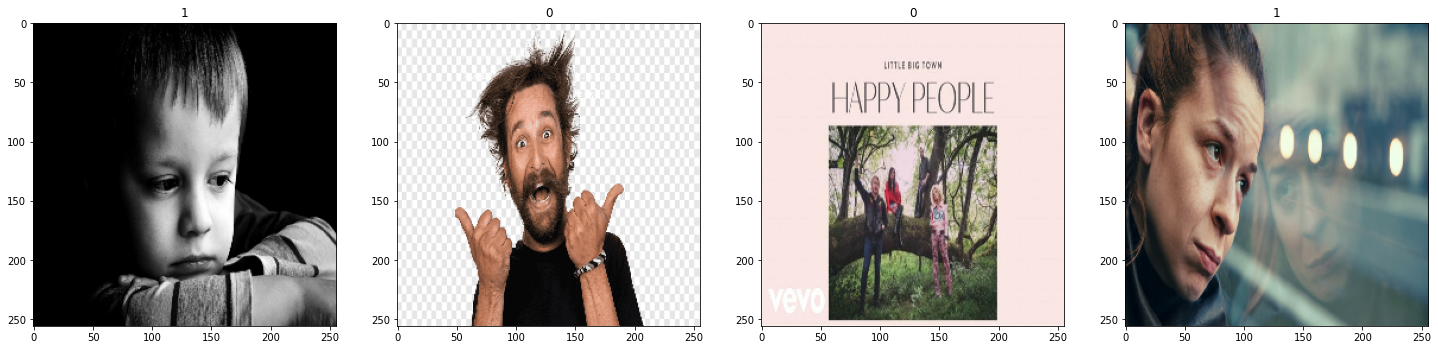

In [27]:
fig, ax = plt.subplots(ncols = 4, figsize=(25,25))
for id, img in enumerate(batch[0][:4]):
  ax[id].imshow(img.astype(int))
  ax[id].title.set_text(batch[1][id])

0: Happy
1: Sad

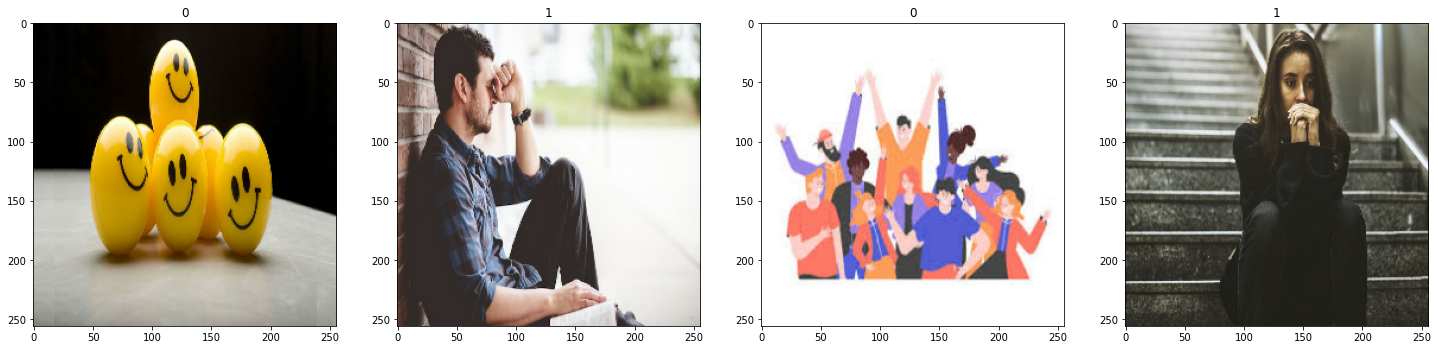

In [28]:
#Next Batch
batch = data_iter.next()
fig, ax = plt.subplots(ncols = 4, figsize=(25,25))
for id, img in enumerate(batch[0][:4]):
  ax[id].imshow(img.astype(int))
  ax[id].title.set_text(batch[1][id])

#Preprocess Data

In [31]:
batch[0].shape

(32, 256, 256, 3)

In [33]:
data = data.map(lambda x,y:(x/255,y))

In [38]:
data.as_numpy_iterator().next()[0].max()

1.0

In [40]:
"{} Batches".format(len(data))

'6 Batches'

In [41]:
train = data.take(4)
val = data.skip(3).take(2)
test = data.skip(5).take(1)

#Deep NN Model

There are 2 APIs Sequential(Quick and Easy) and Funtional(Powerful)

In [52]:
from tensorflow.keras.models import Sequential #1 i/p 1 o/p
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout #Conv2D -- This is CNN

In [53]:
model = Sequential()

In [54]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])  #adam is an optimizer

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#Train

In [57]:
face_model = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
4/4 [==============================] - 16s 3s/step - loss: 0.8930 - accuracy: 0.4766 - val_loss: 0.7598 - val_accuracy: 0.4062
Epoch 2/20
4/4 [==============================] - 13s 3s/step - loss: 0.6945 - accuracy: 0.5234 - val_loss: 0.5738 - val_accuracy: 0.6562
Epoch 3/20
4/4 [==============================] - 13s 3s/step - loss: 0.6124 - accuracy: 0.6484 - val_loss: 0.4989 - val_accuracy: 0.8281
Epoch 4/20
4/4 [==============================] - 13s 3s/step - loss: 0.5262 - accuracy: 0.7344 - val_loss: 0.4711 - val_accuracy: 0.8594
Epoch 5/20
4/4 [==============================] - 16s 3s/step - loss: 0.4535 - accuracy: 0.8438 - val_loss: 0.3325 - val_accuracy: 0.8594
Epoch 6/20
4/4 [==============================] - 15s 4s/step - loss: 0.3298 - accuracy: 0.8516 - val_loss: 0.2316 - val_accuracy: 0.9219
Epoch 7/20
4/4 [==============================] - 16s 4s/step - loss: 0.2461 - accuracy: 0.9062 - val_loss: 0.1438 - val_accuracy: 0.9844
Epoch 8/20
4/4 [==================

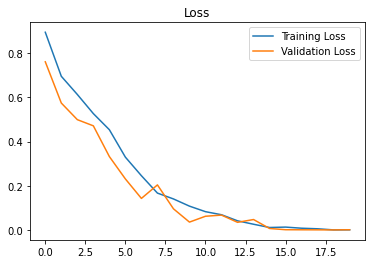

In [68]:
plt.plot(face_model.history['loss'], label="Training Loss")
plt.plot(face_model.history['val_loss'], label="Validation Loss")
plt.legend()
plt.title("Loss")
plt.show()

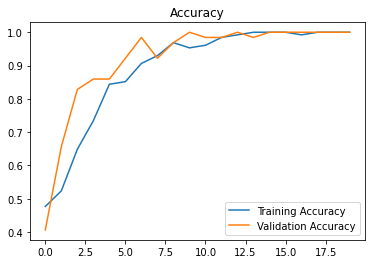

In [70]:
plt.plot(face_model.history['accuracy'], label='Training Accuracy')
plt.plot(face_model.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.legend()
plt.show()

#Performance Evaluation

Evaluation

In [71]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [72]:
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [73]:
for batch in test.as_numpy_iterator():
  X,y = batch
  y_pred = model.predict(X)
  precision.update_state(y, y_pred)
  recall.update_state(y, y_pred)
  acc.update_state(y, y_pred)

1/1 [==============================] - 0s 492ms/step


In [76]:
print("Precision: {}".format(precision.result().numpy()))

Precision: 1.0


Test

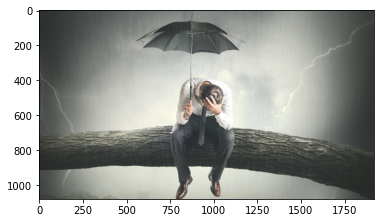

In [101]:
img = cv2.imread('sad_man.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

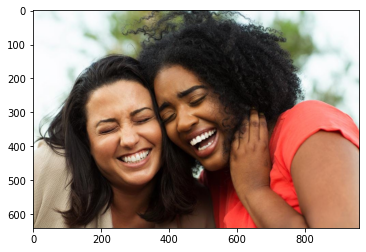

In [102]:
img = cv2.imread('happy_people.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [103]:
img = tf.image.resize(cv2.imread('happy_people.jpg'), (256,256))

In [99]:
img_next = tf.image.resize(cv2.imread('sad_man.jpg'), (256,256))

In [88]:
np.expand_dims(img, 0).shape #Adding more dim since the NN expects batches

(1, 256, 256, 3)

In [106]:
print(model.predict(np.expand_dims(img/255, 0)))#0 is Happy; 1 is Sad

1/1 [==============================] - 0s 94ms/step
[[0.000594]]


In [100]:
print(model.predict(np.expand_dims(img_next/255, 0)))

1/1 [==============================] - 0s 40ms/step
[[0.97771496]]
